# 0. Setting

In [2]:
import os
import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

np.random.seed(20213640)

import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf

# 1. Data preparing

In [3]:
file_list = list(os.listdir('D:/Working_Place/new_uber/data/data_processed'))
fhvhv_list = []
for filename in file_list:
    if 'f' in filename:
        fhvhv_list.append(filename)
fhvhv_list

['f1902.parquet',
 'f1903.parquet',
 'f1904.parquet',
 'f1905.parquet',
 'f1906.parquet',
 'f1907.parquet',
 'f1908.parquet',
 'f1909.parquet',
 'f1910.parquet',
 'f1911.parquet',
 'f1912.parquet',
 'f2001.parquet',
 'f2002.parquet',
 'f2003.parquet',
 'f2004.parquet',
 'f2005.parquet',
 'f2006.parquet',
 'f2007.parquet',
 'f2008.parquet',
 'f2009.parquet',
 'f2010.parquet',
 'f2011.parquet',
 'f2012.parquet',
 'f2101.parquet',
 'f2102.parquet',
 'f2103.parquet',
 'f2104.parquet',
 'f2105.parquet',
 'f2106.parquet',
 'f2107.parquet',
 'f2108.parquet',
 'f2109.parquet',
 'f2110.parquet',
 'f2111.parquet',
 'f2112.parquet',
 'f2201.parquet',
 'f2202.parquet',
 'f2203.parquet',
 'f2204.parquet',
 'f2205.parquet',
 'f2206.parquet',
 'f2207.parquet',
 'f2208.parquet',
 'f2209.parquet',
 'f2210.parquet',
 'f2211.parquet',
 'f2212.parquet']

In [4]:
data_samples = []
for file in tqdm(fhvhv_list):
    each_data = pd.read_parquet('D:/Working_Place/new_uber/data/data_processed/'+file,
                               columns=['hvfhs_license_num','pickup_datetime',
                                       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
                                       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
                                       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
                                       'average_speed'])
    each_data_sampled = each_data.sample(frac=0.01)
    data_samples.append(each_data_sampled)
    del each_data
    del each_data_sampled

100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [07:39<00:00,  9.79s/it]


In [5]:
fdata_sample = pd.concat(data_samples)
del data_samples
fdata_sample.head()

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,average_speed
index,,,,,,,,,,,,,,,,
3176893,HV0003,2019-02-05 08:26:05,2019-02-05 09:00:43,9,223,15.4560,2077,19.08,0.0,0.48,1.69,0.0,0.0,0.0,14.46,26.789408
1584330,HV0002,2019-02-02 21:08:36,2019-02-02 21:37:40,255,125,10.3523,1744,19.98,0.0,0.49,1.77,0.0,0.0,0.0,21.61,21.369427
12182761,HV0005,2019-02-17 18:52:17,2019-02-17 19:01:34,151,166,3.9284,539,4.27,0.0,0.11,0.38,0.0,0.0,0.0,0.00,26.237922
16031509,HV0003,2019-02-23 12:09:41,2019-02-23 12:44:54,190,76,11.2056,2113,28.01,0.0,0.70,2.49,0.0,0.0,0.0,25.14,19.091415
1431789,HV0005,2019-02-02 18:38:54,2019-02-02 18:44:50,213,248,1.5617,299,7.47,0.0,0.19,0.66,0.0,0.0,0.0,5.39,18.803077


In [6]:
len(fdata_sample),fdata_sample.columns

(35941665,
 Index(['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime',
        'PULocationID', 'DOLocationID', 'trip_distance', 'trip_time',
        'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
        'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
        'average_speed'],
       dtype='object'))

# 2. Basic Analysis

# -1. hvfhs_license_number
HV0002 : Juno \
HV0003 : Uber \
HV0004 : Via \
HV0005 : Lyft

In [52]:
fdata_sample_by_license_number = fdata_sample.groupby([fdata_sample.pickup_datetime.dt.year,
                                                     fdata_sample.hvfhs_license_num]).agg({'trip_distance':['count','mean'],
                                                                                           'trip_time':'mean',
                                                                                           'tips':'mean',
                                                                                          'driver_pay':'mean',
                                                                                           'average_speed':'mean'})
fdata_sample_by_license_number

trip_distance              trip_time  \
                                          count      mean         mean   
pickup_datetime hvfhs_license_num                                        
2019            HV0002                    60191  5.916516   995.193933   
                HV0003                  1521223  6.373521  1086.527629   
                HV0004                    98487  5.521552  1260.439885   
                HV0005                   491861  7.054428  1178.882871   
2020            HV0003                   978900  6.241975   955.659047   
                HV0004                    27440  6.469219  1156.982544   
                HV0005                   350834  6.891756  1050.714791   
2021            HV0003                  1193917  6.659035  1059.263845   
                HV0004                     7545  8.242468  1268.585288   
                HV0005                   448548  6.849656  1085.654490   
2022            HV0003                  1452547  6.967649  1129.465433   
                HV0005                   556840  6.911505  1127.992120   

                                       tips driver_pay average_speed  
                                       mean       mean          mean  
pickup_datetime hvfhs_license_num                                     
2019            HV0002             0.318912  14.216085     19.959942  
                HV0003             0.471153  14.625194     20.016429  
                HV0004             0.160330   0.631485     15.628406  
                HV0005             0.799830  11.607121     20.352789  
2020            HV0003             0.410562  13.438559     21.988671  
                HV0004             0.277400   4.808327     19.257833  
                HV0005             0.724054  13.064067     22.063511  
2021            HV0003             0.723199  17.022185     21.151541  
                HV0004             0.534596   8.657421     22.106377  
                HV0005             0.919846  15.454093     21.187649  
2022            HV0003             0.983330  17.918857     20.592094  
                HV0005             0.999671  15.967601     20.703801

In [6]:
uber_trip_sample = fdata_sample[fdata_sample.hvfhs_license_num=='HV0003']

In [7]:
len(uber_trip_sample)

5146587

# -2. Uber trip sample

In [ ]:
uber_trip_sample.head()

In [ ]:
uber_trip_sample.columns

In [8]:
uber_trip_sample['tip_rate']=uber_trip_sample.apply(lambda x: 100*x.tips/(x.base_passenger_fare+x.tolls+x.bcf+x.sales_tax+x.congestion_surcharge+x.airport_fee),axis=1)
uber_trip_sample

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,average_speed,tip_rate
index,,,,,,,,,,,,,,,,,
3176893,HV0003,2019-02-05 08:26:05,2019-02-05 09:00:43,9,223,15.4560,2077,19.08,0.0,0.48,1.69,0.00,0.0,0.00,14.46,26.789408,0.000000
16031509,HV0003,2019-02-23 12:09:41,2019-02-23 12:44:54,190,76,11.2056,2113,28.01,0.0,0.70,2.49,0.00,0.0,0.00,25.14,19.091415,0.000000
9104298,HV0003,2019-02-13 17:17:03,2019-02-13 17:23:22,246,158,1.3846,380,4.74,0.0,0.14,0.48,2.75,0.0,0.00,5.39,13.117263,0.000000
3330511,HV0003,2019-02-05 13:59:24,2019-02-05 14:04:33,116,152,1.4973,309,7.18,0.0,0.18,0.64,0.00,0.0,0.00,10.40,17.444272,0.000000
6513113,HV0003,2019-02-09 21:51:14,2019-02-09 22:15:36,50,7,8.0661,1463,21.60,0.0,0.54,1.93,2.75,0.0,0.00,18.08,19.848230,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17217072,HV0003,2022-12-27 18:39:13,2022-12-27 18:50:34,36,198,3.2200,681,13.37,0.0,0.40,1.19,0.00,0.0,0.00,8.52,17.022026,0.000000
6195454,HV0003,2022-12-10 08:40:05,2022-12-10 08:54:42,75,247,5.1681,877,14.23,0.0,0.43,1.26,0.00,0.0,0.00,11.69,21.214550,0.000000
15139265,HV0003,2022-12-23 20:05:32,2022-12-23 20:11:41,238,166,1.8032,369,8.18,0.0,0.25,0.73,2.75,0.0,0.00,5.40,17.592195,0.000000


In [9]:
uber_trip_sample['is_tip'] = uber_trip_sample['tips'].map(lambda x: 0 if x<=0 else 100)
uber_trip_sample

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,average_speed,tip_rate,is_tip
index,,,,,,,,,,,,,,,,,,
3176893,HV0003,2019-02-05 08:26:05,2019-02-05 09:00:43,9,223,15.4560,2077,19.08,0.0,0.48,1.69,0.00,0.0,0.00,14.46,26.789408,0.000000,0
16031509,HV0003,2019-02-23 12:09:41,2019-02-23 12:44:54,190,76,11.2056,2113,28.01,0.0,0.70,2.49,0.00,0.0,0.00,25.14,19.091415,0.000000,0
9104298,HV0003,2019-02-13 17:17:03,2019-02-13 17:23:22,246,158,1.3846,380,4.74,0.0,0.14,0.48,2.75,0.0,0.00,5.39,13.117263,0.000000,0
3330511,HV0003,2019-02-05 13:59:24,2019-02-05 14:04:33,116,152,1.4973,309,7.18,0.0,0.18,0.64,0.00,0.0,0.00,10.40,17.444272,0.000000,0
6513113,HV0003,2019-02-09 21:51:14,2019-02-09 22:15:36,50,7,8.0661,1463,21.60,0.0,0.54,1.93,2.75,0.0,0.00,18.08,19.848230,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17217072,HV0003,2022-12-27 18:39:13,2022-12-27 18:50:34,36,198,3.2200,681,13.37,0.0,0.40,1.19,0.00,0.0,0.00,8.52,17.022026,0.000000,0
6195454,HV0003,2022-12-10 08:40:05,2022-12-10 08:54:42,75,247,5.1681,877,14.23,0.0,0.43,1.26,0.00,0.0,0.00,11.69,21.214550,0.000000,0
15139265,HV0003,2022-12-23 20:05:32,2022-12-23 20:11:41,238,166,1.8032,369,8.18,0.0,0.25,0.73,2.75,0.0,0.00,5.40,17.592195,0.000000,0


In [10]:
uber_daily = uber_trip_sample.groupby([uber_trip_sample.pickup_datetime.dt.year,
                                       uber_trip_sample.pickup_datetime.dt.month,
                                        uber_trip_sample.pickup_datetime.dt.day]).agg({'trip_distance':['count','mean'],
                                                                                      'trip_time':'mean',
                                                                                      'base_passenger_fare':'mean',
                                                                                      'tips':'mean',
                                                                                       'tip_rate':['min','max','mean'],
                                                                                       'is_tip':'mean',
                                                                                      'driver_pay':'mean',
                                                                                      'average_speed':'mean'})
uber_daily

trip_distance            \
                                                        count      mean   
pickup_datetime pickup_datetime pickup_datetime                           
2019            2               1                        5388  5.945328   
                                2                        5659  6.024034   
                                3                        4665  6.356912   
                                4                        3744  6.700554   
                                5                        3578  6.539781   
...                                                       ...       ...   
2022            12              27                       3049  6.495619   
                                28                       3217  6.824909   
                                29                       3530  7.081692   
                                30                       3865  7.017980   
                                31                       4672  6.459956   

                                                   trip_time  \
                                                        mean   
pickup_datetime pickup_datetime pickup_datetime                
2019            2               1                1086.549926   
                                2                1028.185192   
                                3                 984.434941   
                                4                1119.032853   
                                5                1094.886249   
...                                                      ...   
2022            12              27               1050.762217   
                                28               1112.050668   
                                29               1149.181870   
                                30               1134.889004   
                                31                975.531250   

                                                base_passenger_fare      tips  \
                                                               mean      mean   
pickup_datetime pickup_datetime pickup_datetime                                 
2019            2               1                         14.393914  0.333916   
                                2                         13.204225  0.294849   
                                3                         13.389554  0.308039   
                                4                         14.295553  0.348894   
                                5                         14.377795  0.379438   
...                                                             ...       ...   
2022            12              27                        20.515704  0.939452   
                                28                        20.957902  1.016058   
                                29                        21.550272  1.030561   
                                30                        21.345260  0.897348   
                                31                        20.875342  0.821597   

                                                tip_rate              \
                                                     min         max   
pickup_datetime pickup_datetime pickup_datetime                        
2019            2               1                    0.0  369.204738   
                                2                    0.0  131.926121   
                                3                    0.0   82.644628   
                                4                    0.0   68.027211   
                                5                    0.0  227.272727   
...                                                  ...         ...   
2022            12              27                   0.0  100.824931   
                                28                   0.0  110.497238   
                                29                   0.0  200.000000   
                                30                   0.0  127.376080   
                             

In [ ]:
uber_daily['trip_distance','count'].plot(figsize=(12,7))

In [ ]:
uber_daily['trip_distance','mean'].plot(figsize=(12,7))

In [ ]:
uber_daily[uber_daily['trip_distance','mean']>12]

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

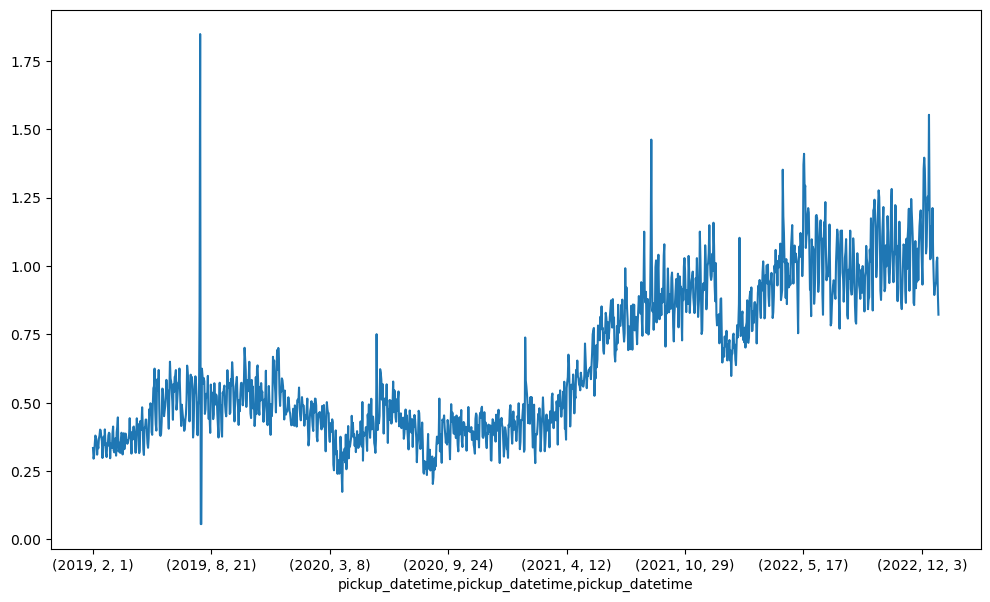

In [11]:
uber_daily['tips','mean'].plot(figsize=(12,7))

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

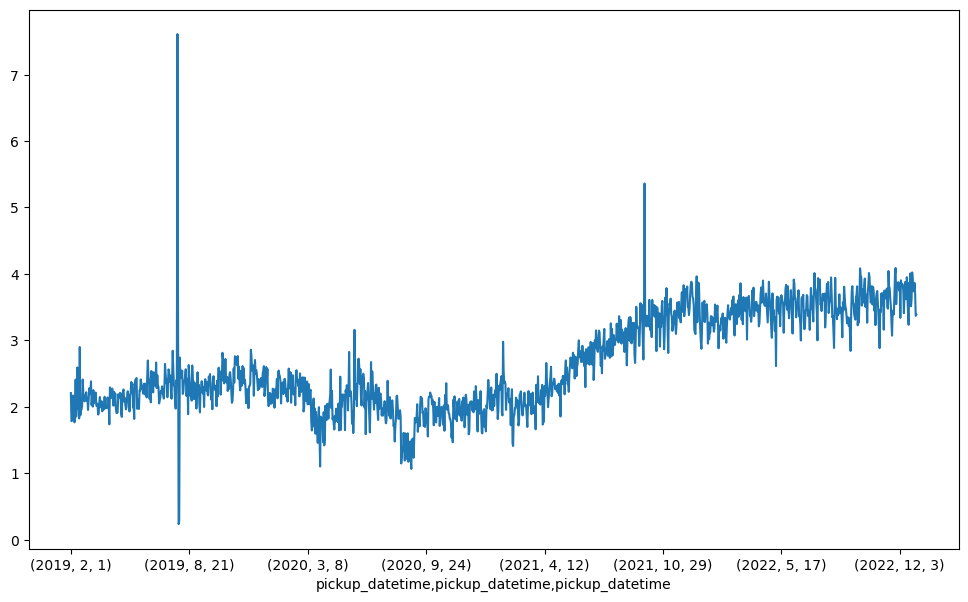

In [12]:
uber_daily['tip_rate','mean'].plot(figsize=(12,7))

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

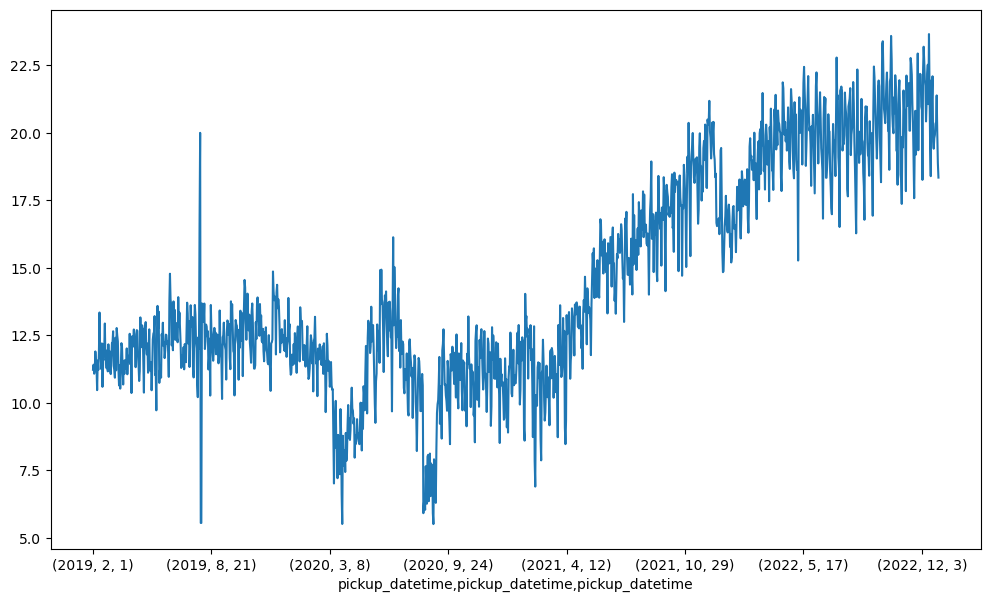

In [13]:
uber_daily['is_tip','mean'].plot(figsize=(12,7))

## *with nonzero tips

In [14]:
uber_sample_with_tip = uber_trip_sample[uber_trip_sample.is_tip==100]
uber_sample_with_tip

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,average_speed,tip_rate,is_tip
index,,,,,,,,,,,,,,,,,,
11626801,HV0003,2019-02-16 23:21:30,2019-02-16 23:55:08,100,223,15.4721,2018,28.10,5.76,0.85,3.05,2.75,0.0,3.00,36.01,27.601368,7.405579,100
9831167,HV0003,2019-02-14 18:00:40,2019-02-14 18:19:04,186,113,2.1574,1103,18.84,0.00,0.48,1.71,2.75,0.0,3.00,19.99,7.041378,12.615643,100
1192010,HV0003,2019-02-02 12:03:51,2019-02-02 12:24:08,148,163,8.0178,1218,19.60,0.00,0.49,1.75,2.75,0.0,1.00,16.55,23.697931,4.066694,100
8362016,HV0003,2019-02-12 15:46:00,2019-02-12 15:54:24,239,142,1.6422,504,7.46,0.00,0.19,0.66,2.75,0.0,2.00,7.39,11.730000,18.083183,100
7935613,HV0003,2019-02-11 20:11:03,2019-02-11 20:20:44,37,17,2.7853,582,12.58,0.00,0.31,1.12,0.00,0.0,2.00,11.38,17.228660,14.275517,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283595,HV0003,2022-12-01 14:12:39,2022-12-01 14:41:58,163,163,2.7048,1759,48.23,0.00,1.45,4.28,2.75,0.0,5.67,39.65,5.535691,9.998237,100
11431413,HV0003,2022-12-17 19:30:15,2022-12-17 19:44:06,145,80,4.1055,831,14.50,0.00,0.44,1.29,0.00,0.0,3.00,10.80,17.785560,18.484288,100
15379468,HV0003,2022-12-24 06:43:17,2022-12-24 06:48:14,190,181,1.4168,297,10.89,0.00,0.33,0.97,0.00,0.0,3.00,6.22,17.173333,24.610336,100


In [15]:
uber_daily_with_tip = uber_sample_with_tip.groupby([uber_sample_with_tip.pickup_datetime.dt.year,
                                                    uber_sample_with_tip.pickup_datetime.dt.month,
                                                    uber_sample_with_tip.pickup_datetime.dt.day]).agg({'trip_distance':['count','mean'],
                                                                                                      'trip_time':'mean',
                                                                                                      'base_passenger_fare':'mean',
                                                                                                      'tips':'mean',
                                                                                                       'tip_rate':['min','max','mean'],
                                                                                                       'driver_pay':'mean',
                                                                                                      'average_speed':'mean'})


uber_daily_with_tip

trip_distance            \
                                                        count      mean   
pickup_datetime pickup_datetime pickup_datetime                           
2019            2               1                         605  6.615583   
                                2                         646  6.735856   
                                3                         517  6.859316   
                                4                         421  7.561914   
                                5                         426  7.186874   
...                                                       ...       ...   
2022            12              27                        622  6.633744   
                                28                        688  7.692337   
                                29                        706  7.737806   
                                30                        730  7.657888   
                                31                        857  6.726644   

                                                   trip_time  \
                                                        mean   
pickup_datetime pickup_datetime pickup_datetime                
2019            2               1                1166.502479   
                                2                1116.733746   
                                3                1026.162476   
                                4                1180.921615   
                                5                1169.511737   
...                                                      ...   
2022            12              27               1156.239550   
                                28               1268.335756   
                                29               1295.110482   
                                30               1228.453425   
                                31               1016.464411   

                                                base_passenger_fare      tips  \
                                                               mean      mean   
pickup_datetime pickup_datetime pickup_datetime                                 
2019            2               1                         17.143719  2.973785   
                                2                         16.166904  2.582895   
                                3                         16.381064  2.779497   
                                4                         17.980380  3.102755   
                                5                         18.046690  3.186925   
...                                                             ...       ...   
2022            12              27                        22.567492  4.605129   
                                28                        24.573852  4.750959   
                                29                        25.117776  5.152805   
                                30                        24.070151  4.751027   
                                31                        22.307351  4.478996   

                                                 tip_rate              \
                                                      min         max   
pickup_datetime pickup_datetime pickup_datetime                         
2019            2               1                0.239006  369.204738   
                                2                2.317497  131.926121   
                                3                2.771619   82.644628   
                                4                0.070323   68.027211   
                                5                1.595405  227.272727   
...                                                   ...         ...   
2022            12              27               4.003203  100.824931   
                                28               1.314348  110.497238   
                                29               1.133658  200.000000   
                                30               2.709293  127.376080   
                

# -3. 스리슬쩍 주가랑 연결해보기

In [16]:
uber_stock = pd.read_csv('D:/Working_Place/new_uber/data/UBER.csv')
uber_stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500
5,2019-05-17,41.980000,43.290001,41.270000,41.910000,41.910000,20225700
6,2019-05-20,41.189999,41.680000,39.459999,41.590000,41.590000,29222300
7,2019-05-21,42.000000,42.240002,41.250000,41.500000,41.500000,10802900
8,2019-05-22,41.049999,41.279999,40.500000,41.250000,41.250000,9089500
9,2019-05-23,40.799999,41.090000,40.020000,40.470001,40.470001,11119900


In [ ]:
uber_daily.loc[2019,2,1]['tips','mean']

In [ ]:
def str_to_date(date):
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:])
    return year,month,day
print(str_to_date('2019-05-10'))

(2019, 5, 10)


In [ ]:
uber_stock

In [18]:
def share_outstanding(date):
    if date<='2019-06-30':
        return 1.111*(10**9)
    elif date<='2019-09-30':
        return 1.700*(10**9)
    elif date<='2019-12-31':
        return 1.248*(10**9)
    elif date<='2020-03-31':
        return 1.724*(10**9)
    elif date<='2020-06-30':
        return 1.739*(10**9)
    elif date<='2020-09-30':
        return 1.755*(10**9)
    elif date<='2020-12-31':
        return 1.753*(10**9)
    elif date<='2021-03-31':
        return 1.859*(10**9)
    elif date<='2021-06-30':
        return 1.956*(10**9)
    elif date<='2021-09-30':
        return 1.899*(10**9)
    elif date<='2021-12-31':
        return 1.896*(10**9)
    elif date<='2022-03-31':
        return 1.958*(10**9)
    elif date<='2022-06-30':
        return 1.969*(10**9)
    elif date<='2022-09-30':
        return 1.979*(10**9)
    else:
        return 1.975*(10**9)

In [19]:
uber_stock['share_outstanding']=uber_stock['Date'].map(lambda x: share_outstanding(x))
uber_stock['mve'] = uber_stock['share_outstanding']*uber_stock['Close']
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume,share_outstanding,mve
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,1.111000e+09,4.618427e+10
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,1.111000e+09,4.121810e+10
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.111000e+09,4.439556e+10
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.111000e+09,4.587319e+10
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.111000e+09,4.777300e+10
...,...,...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300,1.975000e+09,8.484600e+10
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100,1.975000e+09,8.500400e+10
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500,1.975000e+09,8.727525e+10
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900,1.975000e+09,8.364125e+10


In [20]:
def bva(date):
    if date<='2019-06-30':
        return 30.98*(10**9)
    elif date<='2019-09-30':
        return 32.29*(10**9)
    elif date<='2019-12-31':
        return 31.76*(10**9)
    elif date<='2020-03-31':
        return 30.09*(10**9)
    elif date<='2020-06-30':
        return 28.24*(10**9)
    elif date<='2020-09-30':
        return 28.89*(10**9)
    elif date<='2020-12-31':
        return 33.25*(10**9)
    elif date<='2021-03-31':
        return 34.66*(10**9)
    elif date<='2021-06-30':
        return 36.25*(10**9)
    elif date<='2021-09-30':
        return 36.88*(10**9)
    elif date<='2021-12-31':
        return 38.77*(10**9)
    elif date<='2022-03-31':
        return 32.81*(10**9)
    elif date<='2022-06-30':
        return 31.01*(10**9)
    elif date<='2022-09-30':
        return 31.11*(10**9)
    else:
        return 32.11*(10**9)

In [21]:
uber_stock['bva'] = uber_stock.apply(lambda x: bva(x.Date),axis=1)
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume,share_outstanding,mve,bva
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,1.111000e+09,4.618427e+10,3.098000e+10
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,1.111000e+09,4.121810e+10,3.098000e+10
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.111000e+09,4.439556e+10,3.098000e+10
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.111000e+09,4.587319e+10,3.098000e+10
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.111000e+09,4.777300e+10,3.098000e+10
...,...,...,...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300,1.975000e+09,8.484600e+10,3.211000e+10
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100,1.975000e+09,8.500400e+10,3.211000e+10
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500,1.975000e+09,8.727525e+10,3.211000e+10
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900,1.975000e+09,8.364125e+10,3.211000e+10


In [22]:
def bvl(date):
    if date<='2019-06-30':
        return 15.058*(10**9)
    elif date<='2019-09-30':
        return 16.550*(10**9)
    elif date<='2019-12-31':
        return 16.889*(10**9)
    elif date<='2020-03-31':
        return 18.062*(10**9)
    elif date<='2020-06-30':
        return 18.001*(10**9)
    elif date<='2020-09-30':
        return 19.261*(10**9)
    elif date<='2020-12-31':
        return 20.285*(10**9)
    elif date<='2021-03-31':
        return 21.057*(10**9)
    elif date<='2021-06-30':
        return 22.076*(10**9)
    elif date<='2021-09-30':
        return 22.828*(10**9)
    elif date<='2021-12-31':
        return 23.629*(10**9)
    elif date<='2022-03-31':
        return 23.199*(10**9)
    elif date<='2022-06-30':
        return 23.645*(10**9)
    elif date<='2022-09-30':
        return 24.142*(10**9)
    else:
        return 24.035*(10**9)

In [23]:
uber_stock['bvl'] = uber_stock.apply(lambda x: bvl(x.Date),axis=1)
uber_stock

,Date,Open,High,Low,Close,Adj Close,Volume,share_outstanding,mve,bva,bvl
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,1.111000e+09,4.618427e+10,3.098000e+10,1.505800e+10
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,1.111000e+09,4.121810e+10,3.098000e+10,1.505800e+10
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.111000e+09,4.439556e+10,3.098000e+10,1.505800e+10
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.111000e+09,4.587319e+10,3.098000e+10,1.505800e+10
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.111000e+09,4.777300e+10,3.098000e+10,1.505800e+10
...,...,...,...,...,...,...,...,...,...,...,...
1120,2023-10-20,42.720001,43.349998,42.259998,42.959999,42.959999,13941300,1.975000e+09,8.484600e+10,3.211000e+10,2.403500e+10
1121,2023-10-23,42.529999,43.970001,42.250000,43.040001,43.040001,11277100,1.975000e+09,8.500400e+10,3.211000e+10,2.403500e+10
1122,2023-10-24,43.500000,44.325001,43.384998,44.189999,44.189999,17566500,1.975000e+09,8.727525e+10,3.211000e+10,2.403500e+10
1123,2023-10-25,43.299999,43.490002,42.064999,42.349998,42.349998,16495900,1.975000e+09,8.364125e+10,3.211000e+10,2.403500e+10


In [24]:
uber_stock_under_2023 = uber_stock[uber_stock.Date<'2023']
uber_stock_under_2023

,Date,Open,High,Low,Close,Adj Close,Volume,share_outstanding,mve,bva,bvl
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,1.111000e+09,4.618427e+10,3.098000e+10,1.505800e+10
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,1.111000e+09,4.121810e+10,3.098000e+10,1.505800e+10
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.111000e+09,4.439556e+10,3.098000e+10,1.505800e+10
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.111000e+09,4.587319e+10,3.098000e+10,1.505800e+10
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.111000e+09,4.777300e+10,3.098000e+10,1.505800e+10
...,...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,1.975000e+09,4.866400e+10,3.211000e+10,2.403500e+10
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,1.975000e+09,4.819000e+10,3.211000e+10,2.403500e+10
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,1.975000e+09,4.856525e+10,3.211000e+10,2.403500e+10
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,1.975000e+09,4.919725e+10,3.211000e+10,2.403500e+10


In [25]:
uber_daily.loc[(2019,5,10),('tips','mean')]

0.48789493646880333

In [28]:
tip_as_input = []
tip_rate_as_input = []
is_tip_as_input = []

for i in tqdm(uber_stock_under_2023.Date):
    year,month,day = str_to_date(i)
    tip_as_input.append(uber_daily.loc[(year,month,day),('tips','mean')])
    tip_rate_as_input.append(uber_daily.loc[(year,month,day),('tip_rate','mean')])
    is_tip_as_input.append(uber_daily.loc[(year,month,day),('is_tip','mean')])

uber_stock_under_2023['tip']=tip_as_input
uber_stock_under_2023['tip_rate']=tip_rate_as_input
uber_stock_under_2023['is_tip']=is_tip_as_input

uber_stock_under_2023

100%|██████████████████████████████████████████████████████████████████████████████| 919/919 [00:00<00:00, 2773.81it/s]
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:13: SettingWithC

,Date,Open,High,Low,Close,Adj Close,Volume,share_outstanding,mve,bva,bvl,tip,tip_rate,is_tip
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,1.111000e+09,4.618427e+10,3.098000e+10,1.505800e+10,0.487895,2.171907,11.492509
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,1.111000e+09,4.121810e+10,3.098000e+10,1.505800e+10,0.488127,2.208318,12.339810
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.111000e+09,4.439556e+10,3.098000e+10,1.505800e+10,0.552815,2.372605,12.563368
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.111000e+09,4.587319e+10,3.098000e+10,1.505800e+10,0.559487,2.323725,12.620247
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.111000e+09,4.777300e+10,3.098000e+10,1.505800e+10,0.624265,2.347334,13.214740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,1.975000e+09,4.866400e+10,3.211000e+10,2.403500e+10,0.954510,3.628097,19.412942
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,1.975000e+09,4.819000e+10,3.211000e+10,2.403500e+10,0.939452,3.753991,20.400131
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,1.975000e+09,4.856525e+10,3.211000e+10,2.403500e+10,1.016058,3.865569,21.386385
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,1.975000e+09,4.919725e+10,3.211000e+10,2.403500e+10,1.030561,3.702401,20.000000


In [29]:
uber_stock_under_2023['year'] = uber_stock_under_2023['Date'].map(lambda x: str_to_date(x)[0])
uber_stock_under_2023['month'] = uber_stock_under_2023['Date'].map(lambda x: str_to_date(x)[1])
uber_stock_under_2023['day'] = uber_stock_under_2023['Date'].map(lambda x: str_to_date(x)[2])

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [ ]:
def quarter(month):
    if 1<=month<=3:
        return 0
    elif month<=6:
        return 1
    elif month<=9:
        return 2
    else:
        return 3

In [ ]:
uber_stock_under_2023['quarter']=uber_stock_under_2023['month'].map(lambda x:quarter(x))

In [30]:
uber_stock_under_2023['ln_mve'] = np.log(uber_stock_under_2023.mve)
uber_stock_under_2023['ln_bva'] = np.log(uber_stock_under_2023.bva)
uber_stock_under_2023['ln_bvl'] = np.log(uber_stock_under_2023.bvl)

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [31]:
uber_stock_under_2023[(uber_stock_under_2023.tip<=0) |
                     (uber_stock_under_2023.tip_rate<=0)|
                     (uber_stock_under_2023.is_tip<=0)]

,Date,Open,High,Low,Close,Adj Close,Volume,share_outstanding,mve,bva,bvl,tip,tip_rate,is_tip,year,month,day,ln_mve,ln_bva,ln_bvl


In [ ]:
min(uber_stock_under_2023.tip[uber_stock_under_2023.tip>0]),min(uber_stock_under_2023.tip_rate[uber_stock_under_2023.tip_rate>0]),min(uber_stock_under_2023.is_tip[uber_stock_under_2023.is_tip>0])

In [32]:
uber_stock_under_2023['ln_tip'] = np.log(uber_stock_under_2023.tip)
uber_stock_under_2023['ln_tip_rate'] = np.log(uber_stock_under_2023.tip_rate)
uber_stock_under_2023['ln_is_tip'] = np.log(uber_stock_under_2023.is_tip)

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

<AxesSubplot:xlabel='Date'>

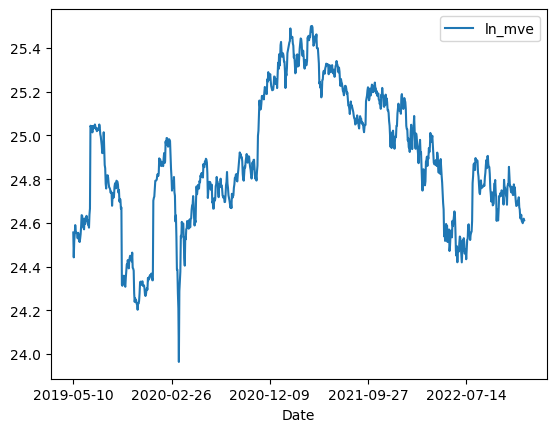

In [35]:
uber_stock_under_2023.plot(x='Date',y='ln_mve')

<AxesSubplot:xlabel='Date'>

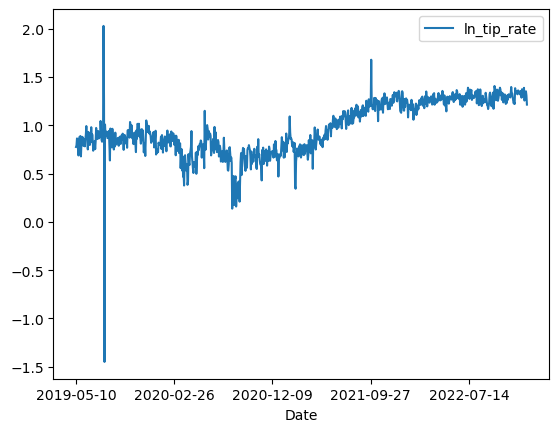

In [36]:
uber_stock_under_2023.plot(x='Date',y='ln_tip_rate')

## 0) default

In [37]:
zeroth_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + C(year)", 
                           data=uber_stock_under_2023).fit()
print(zeroth_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     351.9
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          4.48e-210
Time:                        15:27:40   Log-Likelihood:                 285.78
No. Observations:                 919   AIC:                            -559.6
Df Residuals:                     913   BIC:                            -530.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.7671      3.751     

<AxesSubplot:>

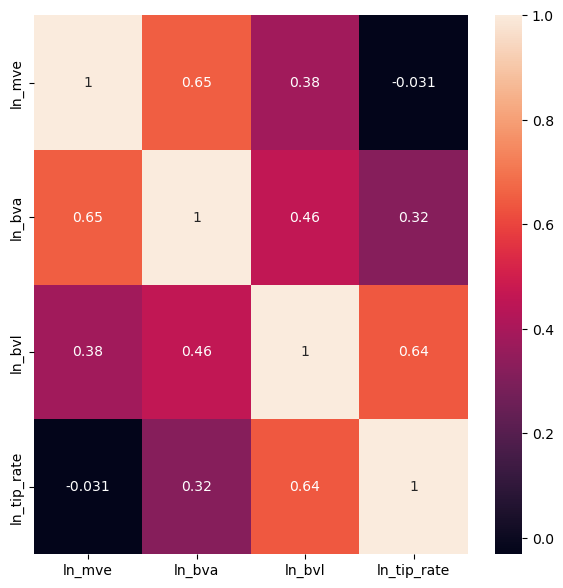

In [44]:
corr_table = uber_stock_under_2023[['ln_mve','ln_bva','ln_bvl','ln_tip_rate']].corr()
plt.rcParams['figure.figsize']=(7,7)
sns.heatmap(corr_table, annot=True)

## 1) just tip

In [29]:
first_regression = smf.ols("mve ~ bva + bvl + tip", 
                           data=uber_stock_under_2023).fit()
print(first_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     635.8
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          3.07e-223
Time:                        17:25:36   Log-Likelihood:                -22599.
No. Observations:                 919   AIC:                         4.521e+04
Df Residuals:                     915   BIC:                         4.523e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.248e+11   4.66e+09    -26.797      0.0

In [30]:
first_regression = smf.ols("mve ~ bva + bvl + tip + C(year)", 
                           data=uber_stock_under_2023).fit()
print(first_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     461.7
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          2.50e-272
Time:                        17:25:41   Log-Likelihood:                -22476.
No. Observations:                 919   AIC:                         4.497e+04
Df Residuals:                     912   BIC:                         4.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.565e+10    8.4e+09     

In [ ]:
second_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip", 
                           data=uber_stock_under_2023).fit()
print(second_regression.summary())

In [31]:
second_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip+C(year)", 
                           data=uber_stock_under_2023).fit()
print(second_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     344.8
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.41e-230
Time:                        17:25:50   Log-Likelihood:                 336.47
No. Observations:                 919   AIC:                            -658.9
Df Residuals:                     912   BIC:                            -625.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.5547      3.850     

In [ ]:
second_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip+ln_trip_amount+C(year)", 
                           data=uber_stock_under_2023).fit()
print(second_regression.summary())

## 2) tip rate

In [ ]:
tip_rate_regression = smf.ols("mve ~ bva + bvl + tip_rate", 
                           data=uber_stock_under_2023).fit()
print(tip_rate_regression.summary())

In [32]:
tip_rate_regression = smf.ols("mve ~ bva + bvl + tip_rate+C(year)", 
                           data=uber_stock_under_2023).fit()
print(tip_rate_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     479.2
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          6.87e-278
Time:                        17:25:54   Log-Likelihood:                -22463.
No. Observations:                 919   AIC:                         4.494e+04
Df Residuals:                     912   BIC:                         4.497e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.966e+09   8.16e+09     

In [38]:
ln_tip_rate_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip_rate+C(year)", 
                           data=uber_stock_under_2023).fit()
print(ln_tip_rate_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     331.8
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          2.43e-225
Time:                        15:27:56   Log-Likelihood:                 324.29
No. Observations:                 919   AIC:                            -634.6
Df Residuals:                     912   BIC:                            -600.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.5759      3.749     

In [42]:
ln_tip_rate_square_regression = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip_rate  +C(year)", 
                           data=uber_stock_under_2023).fit()
print(ln_tip_rate_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     331.8
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          2.43e-225
Time:                        15:31:25   Log-Likelihood:                 324.29
No. Observations:                 919   AIC:                            -634.6
Df Residuals:                     912   BIC:                            -600.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.5759      3.749     

In [ ]:
corr_table = uber_stock_under_2023[['ln_mve','ln_bva','ln_bvl','ln_tip_rate','ln_trip_amount']].corr()
plt.rcParams['figure.figsize']=(5,5)
sns.heatmap(corr_table, annot=True)

In [ ]:
ln_tip_rate_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip_rate + C(year)", 
                                           data=uber_stock_under_2023).fit()
print(ln_tip_rate_regression_with_date.summary())

In [ ]:
ln_tip_rate_ln_trip_amount_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip_rate + ln_trip_amount + C(year)", 
                                                           data=uber_stock_under_2023).fit()
print(ln_tip_rate_ln_trip_amount_regression_with_date.summary())

## 3) is_tip

In [34]:
is_tip_regression = smf.ols("mve ~ bva + bvl + is_tip", 
                            data=uber_stock_under_2023).fit()
print(is_tip_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     590.3
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          2.18e-213
Time:                        19:01:11   Log-Likelihood:                -22622.
No. Observations:                 919   AIC:                         4.525e+04
Df Residuals:                     915   BIC:                         4.527e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.014e+11   4.57e+09    -22.160      0.0

In [35]:
is_tip_regression_with_date = smf.ols("mve ~ bva + bvl + is_tip + C(year)", 
                            data=uber_stock_under_2023).fit()
print(is_tip_regression_with_date.summary())

                            OLS Regression Results                            
Dep. Variable:                    mve   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     428.3
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          2.84e-261
Time:                        19:01:15   Log-Likelihood:                -22501.
No. Observations:                 919   AIC:                         4.502e+04
Df Residuals:                     912   BIC:                         4.505e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.159e+09   8.55e+09     

In [ ]:
ln_is_tip_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_is_tip + C(year)", 
                            data=uber_stock_under_2023).fit()
print(ln_is_tip_regression_with_date.summary())

## 4) How about COVID-19 effect?

In [39]:
uber_stock_under_2023['covid19']=uber_stock_under_2023.Date.map(lambda x: 1 if x>='2020-03-13' else 0)
uber_stock_under_2023.head()

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Open,High,Low,Close,Adj Close,Volume,share_outstanding,mve,bva,...,ln_bva,ln_bvl,ln_tip,ln_tip_rate,ln_is_tip,nonzero_tip,nonzero_tip_rate,ln_nonzero_tip,ln_nonzero_tip_rate,covid19
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,1.111000e+09,4.618427e+10,3.098000e+10,...,24.156608,23.435175,-0.780247,0.774063,2.463771,3.900687,18.457344,1.361153,2.915462,0
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,1.111000e+09,4.121810e+10,3.098000e+10,...,24.156608,23.435175,-0.697080,0.801310,2.482726,4.159370,18.611017,1.425364,2.923754,0
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.111000e+09,4.439556e+10,3.098000e+10,...,24.156608,23.435175,-0.699607,0.804470,2.501071,4.073454,18.330540,1.404491,2.908569,0
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.111000e+09,4.587319e+10,3.098000e+10,...,24.156608,23.435175,-0.633038,0.826956,2.510156,4.314476,18.577856,1.461976,2.921970,0
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.111000e+09,4.777300e+10,3.098000e+10,...,24.156608,23.435175,-0.598303,0.766567,2.479642,4.605378,18.031044,1.527225,2.892095,0


In [52]:
ln_tip_rate_regression_with_date_covid19 = smf.ols("ln_mve ~ ln_bva + ln_bvl +ln_tip_rate+ C(year)", 
                            data=uber_stock_under_2023).fit()
print(ln_tip_rate_regression_with_date_covid19.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     347.6
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          1.15e-231
Time:                        13:22:11   Log-Likelihood:                 339.00
No. Observations:                 919   AIC:                            -664.0
Df Residuals:                     912   BIC:                            -630.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.4941      3.790     

## 5) How about nonzero tips?

In [36]:
tip_as_input = []
for i in uber_stock_under_2023.Date:
    year,month,day = str_to_date(i)
    tip_as_input.append(uber_daily_with_tip.loc[year,month,day]['tips','mean'])
uber_stock_under_2023['nonzero_tip']=tip_as_input

tip_rate_as_input = []
for i in uber_stock_under_2023.Date:
    year,month,day = str_to_date(i)
    tip_rate_as_input.append(uber_daily_with_tip.loc[year,month,day]['tip_rate','mean'])
uber_stock_under_2023['nonzero_tip_rate']=tip_rate_as_input

uber_stock_under_2023

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Date,Open,High,Low,Close,Adj Close,Volume,share_outstanding,mve,bva,...,month,day,ln_mve,ln_bva,ln_bvl,ln_tip,ln_tip_rate,ln_is_tip,nonzero_tip,nonzero_tip_rate
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,1.111000e+09,4.618427e+10,3.098000e+10,...,5,10,24.555905,24.156608,23.435175,-0.780247,0.774063,2.463771,3.900687,18.457344
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,1.111000e+09,4.121810e+10,3.098000e+10,...,5,13,24.442143,24.156608,23.435175,-0.697080,0.801310,2.482726,4.159370,18.611017
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.111000e+09,4.439556e+10,3.098000e+10,...,5,14,24.516405,24.156608,23.435175,-0.699607,0.804470,2.501071,4.073454,18.330540
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.111000e+09,4.587319e+10,3.098000e+10,...,5,15,24.549147,24.156608,23.435175,-0.633038,0.826956,2.510156,4.314476,18.577856
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.111000e+09,4.777300e+10,3.098000e+10,...,5,16,24.589726,24.156608,23.435175,-0.598303,0.766567,2.479642,4.605378,18.031044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,1.975000e+09,4.866400e+10,3.211000e+10,...,12,23,24.608205,24.192433,23.902777,-0.024160,1.301554,2.965451,5.030701,18.939941
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,1.975000e+09,4.819000e+10,3.211000e+10,...,12,27,24.598417,24.192433,23.902777,0.009690,1.334656,3.045825,4.802011,18.065448
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,1.975000e+09,4.856525e+10,3.211000e+10,...,12,28,24.606174,24.192433,23.902777,-0.000950,1.335268,3.043111,4.764103,18.125618
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,1.975000e+09,4.919725e+10,3.211000e+10,...,12,29,24.619104,24.192433,23.902777,-0.024920,1.310912,3.000710,4.852720,18.455665


In [37]:
uber_stock_under_2023['ln_nonzero_tip'] = np.log(uber_stock_under_2023.nonzero_tip)
uber_stock_under_2023['ln_nonzero_tip_rate'] = np.log(uber_stock_under_2023.nonzero_tip_rate)


D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
ln_nonzero_tip_rate_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_nonzero_tip_rate + C(year)", 
                                           data=uber_stock_under_2023).fit()
print(ln_nonzero_tip_rate_regression_with_date.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     311.0
Date:                Thu, 02 Nov 2023   Prob (F-statistic):          1.20e-216
Time:                        19:01:40   Log-Likelihood:                 304.07
No. Observations:                 919   AIC:                            -594.1
Df Residuals:                     912   BIC:                            -560.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.4074    

## 6) 다른 fhvhv와의 비교?

In [62]:
not_uber_trip_sample = fdata_sample[fdata_sample.hvfhs_license_num!='HV0003']
len(not_uber_trip_sample)

2041746

In [63]:
not_uber_trip_sample['tip_rate']=not_uber_trip_sample.apply(lambda x: 100*x.tips/(x.base_passenger_fare+x.tolls+x.bcf+x.sales_tax+x.congestion_surcharge+x.airport_fee),axis=1)
not_uber_trip_sample['is_tip'] = not_uber_trip_sample['tips'].map(lambda x: 0 if x<=0 else 100)
not_uber_daily = not_uber_trip_sample.groupby([not_uber_trip_sample.pickup_datetime.dt.year,
                                                   not_uber_trip_sample.pickup_datetime.dt.month,
                                                    not_uber_trip_sample.pickup_datetime.dt.day]).agg({'trip_distance':['count','mean'],
                                                                                                  'trip_time':'mean',
                                                                                                  'base_passenger_fare':'mean',
                                                                                                  'tips':'mean',
                                                                                                   'tip_rate':['min','max','mean'],
                                                                                                   'is_tip':'mean',
                                                                                                  'driver_pay':'mean',
                                                                                                  'average_speed':'mean'})
not_uber_daily

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


trip_distance            \
                                                        count      mean   
pickup_datetime pickup_datetime pickup_datetime                           
2019            2               1                        2307  6.411073   
                                2                        2187  6.121151   
                                3                        2006  6.284265   
                                4                        1788  6.533656   
                                5                        1805  6.274397   
...                                                       ...       ...   
2022            12              27                       1395  7.251881   
                                28                       1374  7.251606   
                                29                       1484  7.107874   
                                30                       1682  6.864117   
                                31                       1952  6.079318   

                                                   trip_time  \
                                                        mean   
pickup_datetime pickup_datetime pickup_datetime                
2019            2               1                1131.971825   
                                2                1057.322359   
                                3                 980.851446   
                                4                1098.059843   
                                5                1116.613850   
...                                                      ...   
2022            12              27               1117.931183   
                                28               1150.055313   
                                29               1128.388140   
                                30               1119.002973   
                                31                960.659324   

                                                base_passenger_fare      tips  \
                                                               mean      mean   
pickup_datetime pickup_datetime pickup_datetime                                 
2019            2               1                         15.556528  0.596342   
                                2                         14.596676  0.656744   
                                3                         13.691087  0.571147   
                                4                         14.820543  0.598904   
                                5                         14.704687  0.532565   
...                                                             ...       ...   
2022            12              27                        19.408996  0.856674   
                                28                        19.536521  0.929723   
                                29                        19.740472  0.995883   
                                30                        19.778817  0.906451   
                                31                        19.612756  0.951306   

                                                tip_rate              \
                                                     min         max   
pickup_datetime pickup_datetime pickup_datetime                        
2019            2               1                    0.0  188.536953   
                                2                    0.0   88.809947   
                                3                    0.0   89.126560   
                                4                    0.0  100.725222   
                                5                    0.0   89.928058   
...                                                  ...         ...   
2022            12              27                   0.0  104.712042   
                                28                   0.0  190.858865   
                                29                   0.0   64.882401   
                                30                   0.0  111.141984   
                             

<AxesSubplot:xlabel='pickup_datetime,pickup_datetime,pickup_datetime'>

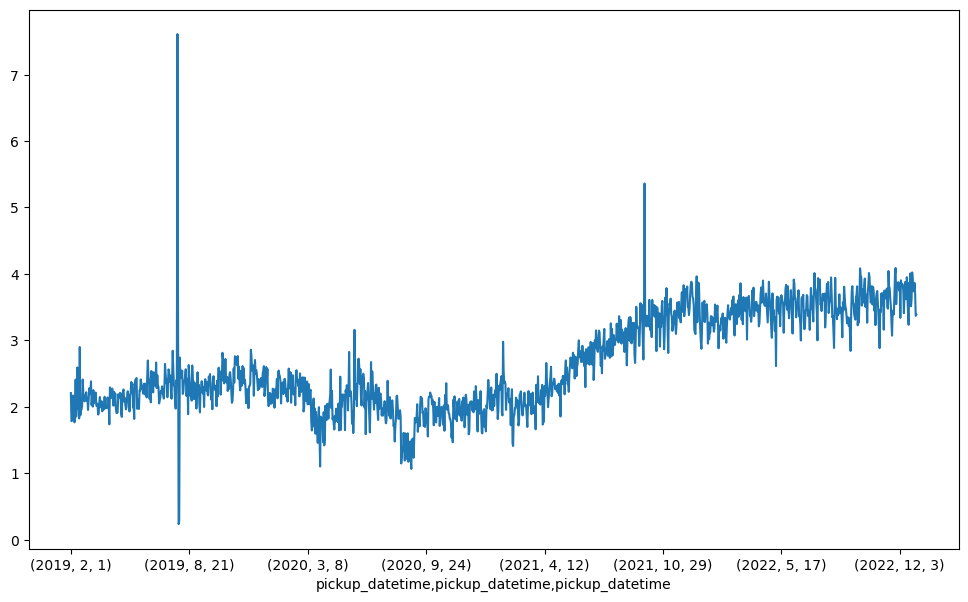

In [65]:
uber_daily['tip_rate','mean'].plot(figsize=(12,7))

In [66]:
tip_as_input = []
tip_rate_as_input = []
is_tip_as_input = []

for i in tqdm(uber_stock_under_2023.Date):
    year,month,day = str_to_date(i)
    tip_as_input.append(not_uber_daily.loc[(year,month,day),('tips','mean')])
    tip_rate_as_input.append(not_uber_daily.loc[(year,month,day),('tip_rate','mean')])
    is_tip_as_input.append(not_uber_daily.loc[(year,month,day),('is_tip','mean')])

uber_stock_under_2023['not_uber_tip']=tip_as_input
uber_stock_under_2023['not_uber_tip_rate']=tip_rate_as_input
uber_stock_under_2023['not_uber_is_tip']=is_tip_as_input

uber_stock_under_2023

100%|██████████████████████████████████████████████████████████████████████████████| 919/919 [00:00<00:00, 2704.71it/s]
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:13: SettingWithC

,Date,Open,High,Low,Close,Adj Close,Volume,share_outstanding,mve,bva,...,day,ln_mve,ln_bva,ln_bvl,ln_tip,ln_tip_rate,ln_is_tip,not_uber_tip,not_uber_tip_rate,not_uber_is_tip
0,2019-05-10,42.000000,45.000000,41.060001,41.570000,41.570000,186322500,1.111000e+09,4.618427e+10,3.098000e+10,...,10,24.555905,24.156608,23.435175,-0.717655,0.775606,2.441695,0.636116,3.207443,16.765873
1,2019-05-13,38.790001,39.240002,36.080002,37.099998,37.099998,79442400,1.111000e+09,4.121810e+10,3.098000e+10,...,13,24.442143,24.156608,23.435175,-0.717179,0.792231,2.512831,0.685239,3.234800,17.120823
2,2019-05-14,38.310001,39.959999,36.849998,39.959999,39.959999,46661100,1.111000e+09,4.439556e+10,3.098000e+10,...,14,24.516405,24.156608,23.435175,-0.592733,0.863989,2.530785,0.702580,3.190136,18.052014
3,2019-05-15,39.369999,41.880001,38.950001,41.290001,41.290001,36086100,1.111000e+09,4.587319e+10,3.098000e+10,...,15,24.549147,24.156608,23.435175,-0.580735,0.843171,2.535302,0.759568,3.391689,17.923497
4,2019-05-16,41.480000,44.060001,41.250000,43.000000,43.000000,38115500,1.111000e+09,4.777300e+10,3.098000e+10,...,16,24.589726,24.156608,23.435175,-0.471180,0.853280,2.581333,0.765198,3.292915,17.758879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2022-12-23,24.459999,24.725000,24.162001,24.639999,24.639999,11610000,1.975000e+09,4.866400e+10,3.211000e+10,...,23,24.608205,24.192433,23.902777,-0.046558,1.288708,2.965940,0.954982,3.857342,18.215223
915,2022-12-27,24.290001,24.700001,23.900000,24.400000,24.400000,15258600,1.975000e+09,4.819000e+10,3.211000e+10,...,27,24.598417,24.192433,23.902777,-0.062458,1.322819,3.015541,0.856674,3.592143,17.777778
916,2022-12-28,24.209999,24.719999,24.020000,24.590000,24.590000,15669200,1.975000e+09,4.856525e+10,3.211000e+10,...,28,24.606174,24.192433,23.902777,0.015931,1.352109,3.062754,0.929723,3.702425,18.995633
917,2022-12-29,24.750000,25.375000,24.290001,24.910000,24.910000,17828300,1.975000e+09,4.919725e+10,3.211000e+10,...,29,24.619104,24.192433,23.902777,0.030103,1.308981,2.995732,0.995883,3.811641,20.013477


In [67]:
uber_stock_under_2023['not_uber_ln_tip'] = np.log(uber_stock_under_2023.not_uber_tip)
uber_stock_under_2023['not_uber_ln_tip_rate'] = np.log(uber_stock_under_2023.not_uber_tip_rate)
uber_stock_under_2023['not_uber_ln_is_tip'] = np.log(uber_stock_under_2023.not_uber_is_tip)

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [70]:
uber_stock_under_2023['ln_tip_rate_uber_not_uber'] = uber_stock_under_2023['ln_tip_rate']-uber_stock_under_2023['not_uber_ln_tip_rate']

D:\Anaconda\envs\new_uber\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Date'>

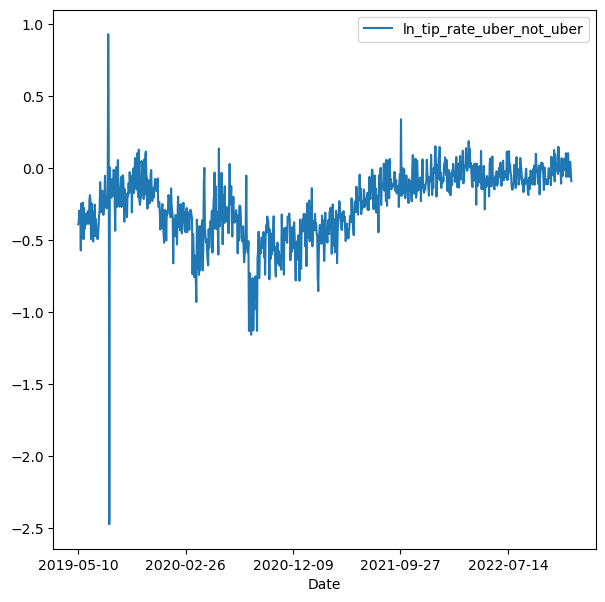

In [71]:
uber_stock_under_2023.plot(x='Date',y='ln_tip_rate_uber_not_uber')

In [72]:
uber_not_uber_regression_with_date = smf.ols("ln_mve ~ ln_bva + ln_bvl + ln_tip_rate_uber_not_uber + C(year)", 
                                           data=uber_stock_under_2023).fit()
print(uber_not_uber_regression_with_date.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_mve   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     310.0
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          3.35e-216
Time:                        16:08:51   Log-Likelihood:                 303.04
No. Observations:                 919   AIC:                            -592.1
Df Residuals:                     912   BIC:                            -558.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

# 3. Graphs

In [ ]:
uber_trip_sample

In [ ]:
uber_trip_sample.columns

# -1. by Time

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'trip_distance':['mean','var']})[('trip_distance','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'trip_distance':['mean','var']})[('trip_distance','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'trip_distance':['mean','var']})[('trip_distance','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'trip_time':['mean','var']})[('trip_time','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'trip_time':['mean','var']})[('trip_time','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'trip_time':['mean','var']})[('trip_time','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.hour).agg({'tips':['mean','var']})[('tips','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.hour).agg({'tip_rate':['mean','var']})[('tip_rate','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.year).agg({'is_tip':['sum','mean']})['is_tip','mean'].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.month).agg({'is_tip':['sum','mean']})['is_tip','mean'].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.weekday).agg({'is_tip':['mean','sum']})[('is_tip','mean')].plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.pickup_datetime.dt.hour).agg({'is_tip':['mean','var']})[('is_tip','mean')].plot(kind='bar')

# -2. Location

In [ ]:
taxi_zone = pd.read_csv('D:/Working_Place/new_uber/data/taxi_zone_lookup.csv')
taxi_zone

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.PULocationID).agg({'tip_rate':'mean'}).plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.PULocationID).agg({'is_tip':'mean'}).plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.DOLocationID).agg({'tip_rate':'mean'}).plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.DOLocationID).agg({'is_tip':'mean'}).plot(kind='bar')

In [ ]:
uber_trip_sample.groupby(uber_trip_sample.DOLocationID).agg({'is_tip':'mean'})[uber_trip_sample.groupby(uber_trip_sample.DOLocationID).agg({'is_tip':'mean'}).is_tip>0.3]

In [ ]:
taxi_zone[(taxi_zone.LocationID==110) | (taxi_zone.LocationID==138)]

# 4. Regression

In [ ]:
uber_trip_sample

In [ ]:
uber_trip_sample.columns

In [ ]:
corr_dt=uber_trip_sample[['tips','tip_rate','is_tip','trip_distance','trip_time','base_passenger_fare','congestion_surcharge','airport_fee','average_speed']].corr()
plt.rcParams['figure.figsize']=(10,10)
sns.heatmap(corr_dt, annot=True)

In [ ]:
zeroth_regression = smf.ols("tips ~ trip_time + average_speed+\
                            C(pickup_datetime.dt.year)+\
                            C(pickup_datetime.dt.month)+\
                            C(pickup_datetime.dt.day)+\", 
                           data=uber_trip_sample).fit()
print(zeroth_regression.summary())